# OCEANIC AIRSPACE PROJECT

Installing all libraries

In [1]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 23.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 33.7 MB/s eta 0:00:0000:01:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install geopy

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 14.5 MB/s eta 0:00:00
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install shapely 

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 32.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.0
    Uninstalling matplotlib-3.5.0:
      Successfully uninstalled matplotlib-3.5.0
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandasql

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26781 sha256=935fa3b24c08d57ba899d70f6b77b00d9a8cbda1546c7743a4b3d54aeee98322
  Stored in directory: /home/ec2-user/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Importing libraries 

In [1]:
#Import Libraries
import pandas as pd
#import geopandas as ps
#import geopy as gy
#import shapely as sy
import dask.dataframe as dd
#import matplotlib.pyplot as plt
#import pandasql as pq

Pulling the full raw dataset and doing initial transformations

In [2]:
#Setup the path for the file -- might have to change this if yours is named differently
bucket = 'daen-690-pacific-deviations/raw-data' #Bucket name
data_key = 'TOMRDate=2021-12-24.csv' #Path to the CSV file 
data_location = 's3://{}/{}'.format(bucket, data_key)

In [3]:
#Import all of the raw data 
rawData_df = dd.read_csv(data_location, assume_missing=True)
print(f'Total record count : ',len(rawData_df.index))

Total record count :  3303988


In [4]:
#New dataframe with selected attributes from the raw data
airspaceData_df =rawData_df[["FRN73TMRPDateTimeOfMessageRec","FRN131HRPWCFloatingPointLat","FRN131HRPWCFloatingPointLong",
                 "FRN145FLFlightLevel", "FRN170TITargetId","RESHSelectedHeading","FRN80TATargetAddress",
                 "FRN161TNTrackNumber"]]

#Rename columns to make it easier to read
airspaceData_df = airspaceData_df.rename(columns={'FRN73TMRPDateTimeOfMessageRec': 'DateTime', 
                                                  'FRN131HRPWCFloatingPointLat': "Latitude", 
                                                  'FRN131HRPWCFloatingPointLong': "Longitude", 
                                                  'FRN145FLFlightLevel': "Height", 
                                                  'FRN170TITargetId': "TargetID", 
                                                  'RESHSelectedHeading': "SelectedHeading", 
                                                  'FRN80TATargetAddress': "TargetAddress",
                                                  'FRN161TNTrackNumber': "TrackNumber"})

#Preview to ensure everything is looking as expected 
airspaceData_df.head()

,DateTime,Latitude,Longitude,Height,TargetID,SelectedHeading,TargetAddress,TrackNumber
0,2021-12-24T23:59:59.992Z,21.325208,-158.058116,20.00,UAL253,78.750000,AA92F9,1277.0
1,2021-12-24T20:54:11.141Z,21.321762,-157.908142,-1.25,N357MH,NaN,A3FFE9,640.0
2,2021-12-24T12:36:02.773Z,37.307144,-139.574170,350.00,ASA899,NaN,A7B779,1024.0
3,2021-12-24T04:13:17.836Z,21.496660,-146.918742,360.00,HAL50,NaN,A48E9E,1024.0
4,2021-12-24T23:59:59.984Z,25.936523,-149.628348,380.00,SWA2385,45.703125,ABF949,1024.0


In [5]:
# Remove anything less than 240 flight level 
airspaceData1 = airspaceData_df[(airspaceData_df['Height'] >= 240)]

In [6]:
airspaceData1.head()

,DateTime,Latitude,Longitude,Height,TargetID,SelectedHeading,TargetAddress,TrackNumber
2,2021-12-24T12:36:02.773Z,37.307144,-139.574170,350.00,ASA899,NaN,A7B779,1024.0
3,2021-12-24T04:13:17.836Z,21.496660,-146.918742,360.00,HAL50,NaN,A48E9E,1024.0
4,2021-12-24T23:59:59.984Z,25.936523,-149.628348,380.00,SWA2385,45.703125,ABF949,1024.0
5,2021-12-24T20:54:11.117Z,28.167389,-127.572661,390.00,FJI810,43.593750,C8809D,1024.0
6,2021-12-24T12:36:02.750Z,48.981194,-131.626113,389.75,JAL10,70.312500,86E84C,624.0


In [8]:
# Convert dask dataframe to pandas dataframe
airspaceData = airspaceData1.compute()

In [9]:
# Remove unnescessary characters 
char = ['T','Z']
for x in char:
    airspaceData["DateTime"] = airspaceData["DateTime"].str.replace( x ," ")

# Formatted Datetime
airspaceData["DateTime"] = pd.to_datetime(airspaceData["DateTime"], format="%Y-%m-%d %H:%M:%S")

In [10]:
# Create 4 new columns for Hour, Minute, Second and Microsecond
airspaceData["Hour"] = airspaceData["DateTime"].dt.hour
airspaceData["Minute"] = airspaceData["DateTime"].dt.minute
airspaceData["Second"] = airspaceData["DateTime"].dt.second
airspaceData["microSecond"] = airspaceData["DateTime"].dt.microsecond

In [11]:
# Reorder columns
airspaceData = airspaceData[["DateTime","Hour","Minute","Second","microSecond","Latitude","Longitude","Height",
                                   "TargetID","SelectedHeading","TargetAddress",
                                   "TrackNumber"]]

# Preview Dataframe
airspaceData.head()

,DateTime,Hour,Minute,Second,microSecond,Latitude,Longitude,Height,TargetID,SelectedHeading,TargetAddress,TrackNumber
2,2021-12-24 12:36:02.773,12,36,2,773000,37.307144,-139.574170,350.00,ASA899,NaN,A7B779,1024.0
3,2021-12-24 04:13:17.836,4,13,17,836000,21.496660,-146.918742,360.00,HAL50,NaN,A48E9E,1024.0
4,2021-12-24 23:59:59.984,23,59,59,984000,25.936523,-149.628348,380.00,SWA2385,45.703125,ABF949,1024.0
5,2021-12-24 20:54:11.117,20,54,11,117000,28.167389,-127.572661,390.00,FJI810,43.593750,C8809D,1024.0
6,2021-12-24 12:36:02.750,12,36,2,750000,48.981194,-131.626113,389.75,JAL10,70.312500,86E84C,624.0


In [15]:
airspaceData = airspaceData[(airspaceData['Second'] < 5)]
print(f'Total record count : ',len(airspaceData.index))

Total record count :  211679


Creating a pandas dataframe and exporting to call to the new dataset in the future if the full raw data is not needed

In [16]:
#Convert pandas dataframe to a CSV to export
airspaceData.to_csv('airspaceData.csv', index=False, header=True)

#Moving the CSV file of the pandas dataframe into the S3 bucket to download and move to other tools to see what works best
import sagemaker, boto3, os
bucket = sagemaker.Session().default_bucket()
prefix = "demo-sagemaker-filtered-data"

boto3.Session().resource('s3').Bucket(bucket).Object(
    os.path.join(prefix, 'data/airspaceData.csv')).upload_file('airspaceData.csv')

In [2]:
#Importing the filtered/formatted data directly from an S3 bucket

#Setup the path for the file directly to the filtered data
bucket = 'sagemaker-us-east-1-894020172474/demo-sagemaker-filtered-data/data' #Bucket name
data_key = 'airspaceData.csv' #Path to the CSV file 
data_location = 's3://{}/{}'.format(bucket, data_key)

airspaceData = pd.read_csv(data_location)
print(f'Total record count : ',len(airspaceData))

Total record count :  3303988


Data exploration on the pandas dataframe

In [13]:
# Show data information
airspaceData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2540762 entries, 2 to 9701
Data columns (total 12 columns):
 #   Column           Dtype         
---  ------           -----         
 0   DateTime         datetime64[ns]
 1   Hour             int64         
 2   Minute           int64         
 3   Second           int64         
 4   microSecond      int64         
 5   Latitude         float64       
 6   Longitude        float64       
 7   Height           float64       
 8   TargetID         object        
 9   SelectedHeading  float64       
 10  TargetAddress    object        
 11  TrackNumber      float64       
dtypes: datetime64[ns](1), float64(5), int64(4), object(2)
memory usage: 252.0+ MB


In [13]:
# count missing data
missing_columns = []
missing_count = []
Percentmissing = []
for col in airspaceData.columns:
    if airspaceData[col].isna().any() == True:
        missing_columns.append(col)
        count = airspaceData[col].isna().sum()
        missing_count.append(count)
        Percentmissing.append(round(count *100/len(airspaceData),1))
    missing_df = {'Column name':missing_columns,'Missing':missing_count, 'Percent missing':Percentmissing}
    missingValues_df = pd.DataFrame(missing_df)
missingValues_df

,Column name,Missing,Percent missing
0,Height,252170,7.6
1,TargetID,10716,0.3
2,SelectedHeading,1094058,33.1
3,TrackNumber,11091,0.3


Begin Mapping Flights

In [16]:
# Select flight TargetID to map
data_select = airspaceData[airspaceData['TargetID'] == 'ASA899']
gdf_flight = ps.GeoDataFrame(data_select, 
                      geometry=ps.points_from_xy(data_select.Longitude, data_select.Latitude))

In [17]:
# Select Time to map
data_select = airspaceData.loc[(airspaceData['Hour'] == 23) & (airspaceData['Minute'] == 59)]
gdf_time = ps.GeoDataFrame(data_select, 
                      geometry=ps.points_from_xy(data_select.Longitude, data_select.Latitude))

In [18]:
# get build in dataset from geopandas
world_data = ps.read_file(ps.datasets.get_path('naturalearth_lowres'))

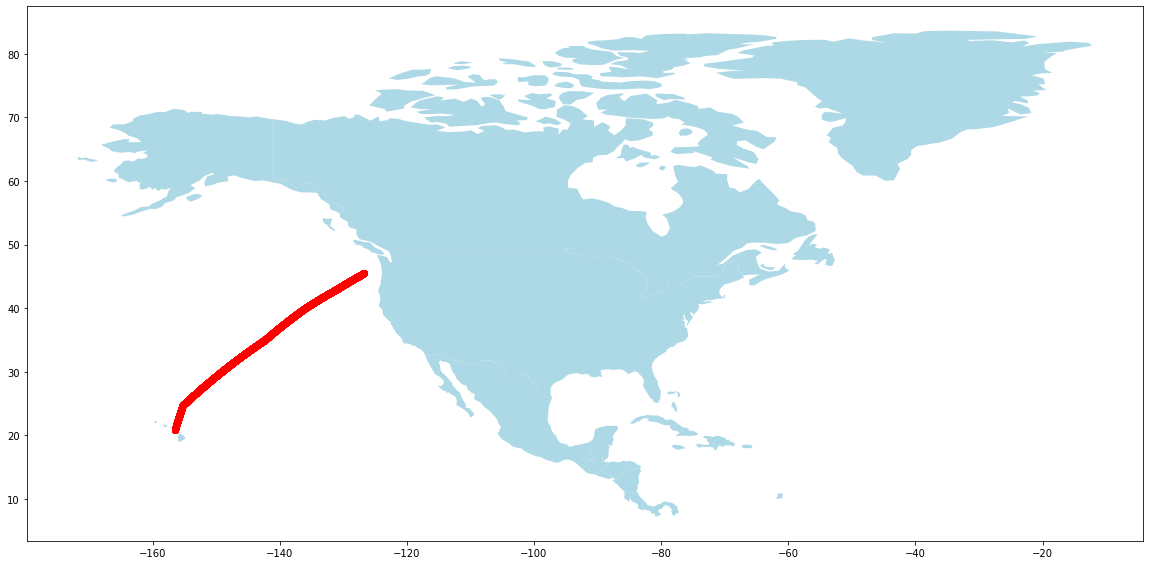

In [19]:
# Plot world map
axis = world_data[world_data.continent == 'North America'].plot(color = 'lightblue')
gdf_flight.plot(ax = axis, color = 'red')

fig = plt.gcf()
fig.set_size_inches(20,18)
plt.show()

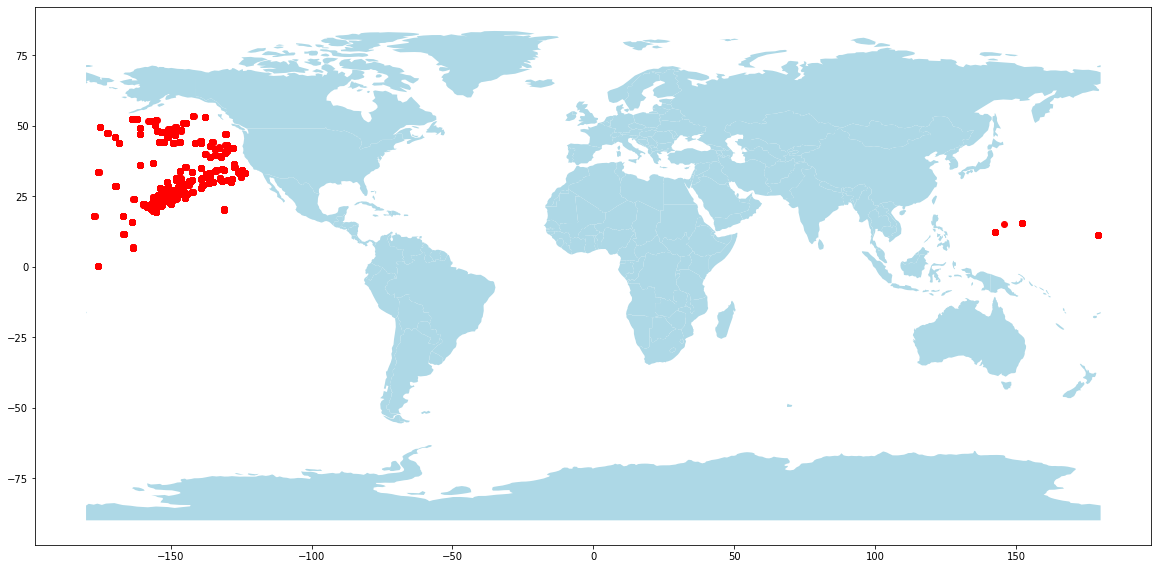

In [20]:
# Plot world map
axis = world_data.plot(color = 'lightblue')
gdf_time.plot(ax = axis, color = 'red')

fig = plt.gcf()
fig.set_size_inches(20,18)
plt.show()

In [ ]:
#Convert pandas dataframe to a CSV to export
airspaceData.to_csv('airspaceData.csv', index=False, header=False)

#Moving the CSV file of the pandas dataframe into the S3 bucket to download and move to other tools to see what works best
import sagemaker, boto3, os
bucket = sagemaker.Session().default_bucket()
prefix = "demo-sagemaker-filtered-data"

boto3.Session().resource('s3').Bucket(bucket).Object(
    os.path.join(prefix, 'data/airspaceData.csv')).upload_file('airspaceData.csv')

In [ ]:
#Import Additional libraries
import seaborn as sns

In [ ]:
# Plot the record number for TargetID at 23:59
plt.figure(figsize=(45, 10))
g = sns.countplot(data=gdf_time, x="TargetID",
              order = gdf_time['TargetID'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("records for each TargetID at 23:59")

In [ ]:
# Plot the record number for each hour
df_hour_count = pd.DataFrame(airspaceData["Hour"].value_counts())
df_hour_count = df_hour_count.reset_index()
df_hour_count = df_hour_count.rename(columns={"Hour":"count", "index":"Hour"})
g = sns.barplot(data=df_hour_count.reset_index(), y="count", x="Hour")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("records for each hour")

In [ ]:
gdf = ps.GeoDataFrame(gdf_time, 
                       geometry=ps.points_from_xy(gdf_time.Longitude, gdf_time.Latitude))
world = ps.read_file(ps.datasets.get_path('naturalearth_lowres'))

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
# Plot the 
fig, ax = plt.subplots(1, 1, figsize=(40, 20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="3%", pad=0.1)

world.plot(ax=ax, color='lightblue', edgecolor='gray')
g = gdf.plot(column='TargetID', ax=ax, markersize=50, legend=True, cax=cax)
g.set_title("Flight Stamp for TargetID at 23:59")
plt.show()

In [ ]:
n = len(pd.unique(airspaceData['TargetID']))
  
print("No.of.unique values :", 
      n)

In [ ]:
import seaborn as sns

In [ ]:
sns.boxplot(x = gdf_time.TargetID, y = gdf_time.FlightLevel)
sns.set(rc = {'figure.figsize':(60,80)})
plt.xlabel("Airlines")
plt.ylabel("FlightLevel")
plt.xticks(rotation=-90)
plt.title("Flight Level at 23:59")
plt.show()